
# ADBMS Vishal & Somesh


## Initial Data Exploration

In [2]:
import pandas as pd

dfr1 = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
dfr2 = pd.read_csv('rotten_tomatoes_movie_reviews.csv')
dfm1 = pd.read_csv('rotten_tomatoes_movies_1.csv')
dfm2 = pd.read_csv('rotten_tomatoes_movies_2.csv')
print(dfr1.shape)
print(dfr2.shape)
print(dfm1.shape)
print(dfm2.shape)
for i in (dfr1, dfr2, dfm1, dfm2):
    display(i.head(1))

(1130017, 8)
(1444963, 11)
(17712, 22)
(143258, 16)


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...


,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN


In [2]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [3]:
from tabulate import tabulate

def print_column_titles(dfr1, dfr2, dfm1, dfm2):
    columns_data = {
        'DataFrame': ['dfr1', 'dfr2', 'dfm1', 'dfm2'],
        'Column Titles': [
            dfr1.columns.tolist(),
            dfr2.columns.tolist(),
            dfm1.columns.tolist(),
            dfm2.columns.tolist()
        ]
    }

    max_columns = max(len(col_list) for col_list in columns_data['Column Titles'])

    rows = []
    for i in range(max_columns):
        row = []
        for col_titles in columns_data['Column Titles']:
            row.append(col_titles[i] if i < len(col_titles) else '') 
        rows.append(row)

    final_df = pd.DataFrame(rows, columns=columns_data['DataFrame'])

    print(tabulate(final_df, headers='keys', tablefmt='grid', showindex=False))

print_column_titles(dfr1, dfr2, dfm1, dfm2)

+----------------------+----------------+----------------------------------+----------------------+
| dfr1                 | dfr2           | dfm1                             | dfm2                 |
+======================+================+==================================+======================+
| rotten_tomatoes_link | id             | rotten_tomatoes_link             | id                   |
+----------------------+----------------+----------------------------------+----------------------+
| critic_name          | reviewId       | movie_title                      | title                |
+----------------------+----------------+----------------------------------+----------------------+
| top_critic           | creationDate   | movie_info                       | audienceScore        |
+----------------------+----------------+----------------------------------+----------------------+
| publisher_name       | criticName     | critics_consensus                | tomatoMeter          |


## Data Preprocessing

In [4]:
dfr1.rename(columns={'rotten_tomatoes_link':'id'}, inplace=True)
dfm1.rename(columns={'rotten_tomatoes_link':'id'},  inplace=True)
dfr2.rename(columns={'criticName': 'critic_name', 'creationDate':'review_date', 'isTopCritic':'top_critic', 'publicatioName': 'publisher_name',
                      'reviewText': 'review_content','originalScore':'review_score', 'reviewState': 'review_type'}, inplace=True)
dfm2.rename(columns={'title':'movie_title'}, inplace=True)
print_column_titles(dfr1, dfr2, dfm1, dfm2)

+----------------+----------------+----------------------------------+----------------------+
| dfr1           | dfr2           | dfm1                             | dfm2                 |
+================+================+==================================+======================+
| id             | id             | id                               | id                   |
+----------------+----------------+----------------------------------+----------------------+
| critic_name    | reviewId       | movie_title                      | movie_title          |
+----------------+----------------+----------------------------------+----------------------+
| top_critic     | review_date    | movie_info                       | audienceScore        |
+----------------+----------------+----------------------------------+----------------------+
| publisher_name | critic_name    | critics_consensus                | tomatoMeter          |
+----------------+----------------+-------------------------

In [5]:
def display_null_values_by_dataframe(dataframes, names):
    columns_with_nulls = [
        [f"'{col}' {df[col].isnull().sum()}" for col in df.columns] 
        for df in dataframes
    ]
    
    max_columns = max(len(cols) for cols in columns_with_nulls)

    rows = []
    for i in range(max_columns):
        row = []
        for cols in columns_with_nulls:
            row.append(cols[i] if i < len(cols) else '')
        rows.append(row)

    final_df = pd.DataFrame(rows, columns=names)
    colalign = ["left"] * len(names)
    print(tabulate(final_df, headers="keys", tablefmt="plain", showindex=False, colalign=colalign))

dataframes = [dfr1, dfr2, dfm1, dfm2]
names = ['DFR1', 'DFR2', 'DFM1', 'DFM2']

display_null_values_by_dataframe(dataframes, names)

DFR1                    DFR2                    DFM1                                  DFM2
'id' 0                  'id' 0                  'id' 0                                'id' 0
'critic_name' 18529     'reviewId' 0            'movie_title' 0                       'movie_title' 367
'top_critic' 0          'review_date' 0         'movie_info' 321                      'audienceScore' 70010
'publisher_name' 0      'critic_name' 0         'critics_consensus' 8578              'tomatoMeter' 109381
'review_type' 0         'top_critic' 0          'content_rating' 0                    'rating' 129267
'review_score' 305936   'review_score' 435218   'genres' 19                           'ratingContents' 129267
'review_date' 0         'review_type' 0         'directors' 194                       'releaseDateTheaters' 112485
'review_content' 65806  'publisher_name' 0      'authors' 1542                        'releaseDateStreaming' 63838
                        'review_content' 69225  'actors

In [6]:
dfr2.drop(columns=['reviewId','scoreSentiment','reviewUrl' ], inplace=True)
for i in dfr1, dfm1, dfr2, dfm2:
    display(i.head(2))
    display(i.info())

,id,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1130017 non-null  object
 1   critic_name     1111488 non-null  object
 2   top_critic      1130017 non-null  bool  
 3   publisher_name  1130017 non-null  object
 4   review_type     1130017 non-null  object
 5   review_score    824081 non-null   object
 6   review_date     1130017 non-null  object
 7   review_content  1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


None

,id,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

None

,id,review_date,critic_name,top_critic,review_score,review_type,publisher_name,review_content
0,beavers,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...
1,blood_mask,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   review_date     1444963 non-null  object
 2   critic_name     1444963 non-null  object
 3   top_critic      1444963 non-null  bool  
 4   review_score    1009745 non-null  object
 5   review_type     1444963 non-null  object
 6   publisher_name  1444963 non-null  object
 7   review_content  1375738 non-null  object
dtypes: bool(1), object(7)
memory usage: 78.5+ MB


None

,id,movie_title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   movie_title           142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139041 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23001 non-null   object 
 15  

None

In [7]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import regexp_replace, col

In [8]:
# Create a Spark session
spark = SparkSession.builder \
    .appName("New_NLP") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()# Create Spark DataFrames from pandas DataFrames
sp_dfr1 = spark.createDataFrame(dfr1)
sp_dfr2 = spark.createDataFrame(dfr2)
sp_dfm1 = spark.createDataFrame(dfm1)
sp_dfm2 = spark.createDataFrame(dfm2)# Drop rows with missing values
sp_dfr1 = sp_dfr1.na.drop()
sp_dfr2 = sp_dfr2.na.drop()# Tokenize the review content
tokenizer = Tokenizer(inputCol="review_content", outputCol="tokens")
sp_dfr1 = tokenizer.transform(sp_dfr1)
sp_dfr2 = tokenizer.transform(sp_dfr2)# Remove non-alphanumeric characters from review content
sp_dfr1 = sp_dfr1.withColumn("review_content", regexp_replace(col("review_content"), "[^a-zA-Z0-9\s,;]", ""))
sp_dfr2 = sp_dfr2.withColumn("review_content", regexp_replace(col("review_content"), "[^a-zA-Z0-9\s,;]", ""))# Display a sample of the transformed data
sp_dfr2.show(2)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/25 00:58:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/11/25 01:00:07 WARN TaskSetManager: Stage 0 contains a task of very large size (31408 KiB). The maximum recommended task size is 1000 KiB.


+----------+-----------+---------------+----------+------------+-----------+--------------------+--------------------+--------------------+
|        id|review_date|    critic_name|top_critic|review_score|review_type|      publisher_name|      review_content|              tokens|
+----------+-----------+---------------+----------+------------+-----------+--------------------+--------------------+--------------------+
|   beavers| 2003-05-23|Ivan M. Lincoln|     false|       3.5/4|      fresh|Deseret News (Sal...|Timed to be just ...|[timed, to, be, j...|
|blood_mask| 2007-06-02|  The Foywonder|     false|         1/5|     rotten|       Dread Central|It doesnt matter ...|[it, doesn't, mat...|
+----------+-----------+---------------+----------+------------+-----------+--------------------+--------------------+--------------------+
only showing top 2 rows



24/11/25 01:00:11 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 0 (TID 0): Attempting to kill Python Worker


## Data Integration
 An inner join to merge the review data with the corresponding movie data, using the ‘id’ column as the key.

In [10]:
# Inner join to merge review data with movie data
reviews1 = sp_dfr1.join(sp_dfm1, "id", "inner")
reviews2 = sp_dfr2.join(sp_dfm2, "id", "inner")

# Free up memory by unpersisting Spark DataFrames
sp_dfr1.unpersist()
sp_dfr2.unpersist()
sp_dfm1.unpersist()
sp_dfm2.unpersist()# Select only the necessary columns
reviews1 = reviews1.select('movie_title', 'critic_name', 'top_critic', 'publisher_name', 'review_type', 'review_score', 'review_date', 'review_content' )
reviews2 = reviews2.select('movie_title', 'critic_name', 'top_critic', 'publisher_name', 'review_type', 'review_score', 'review_date', 'review_content' )# Drop rows with missing values
reviews1 = reviews1.na.drop()
reviews2 = reviews2.na.drop()# Combine both review DataFrames into one for further analysis
merged_df = reviews1.union(reviews2)# Display a sample of the merged DataFrame
merged_df.show(1)# Save the merged data locally (this will be uploaded to HDFS)
merged_df.coalesce(1).write.csv('reviewsjoined.csv', header=True)# Stop the Spark session
spark.stop()

24/11/25 01:03:39 WARN TaskSetManager: Stage 20 contains a task of very large size (22197 KiB). The maximum recommended task size is 1000 KiB.
24/11/25 01:03:43 WARN TaskSetManager: Stage 21 contains a task of very large size (2185 KiB). The maximum recommended task size is 1000 KiB.
24/11/25 01:03:44 WARN TaskSetManager: Stage 22 contains a task of very large size (31408 KiB). The maximum recommended task size is 1000 KiB.
24/11/25 01:03:49 WARN TaskSetManager: Stage 23 contains a task of very large size (3194 KiB). The maximum recommended task size is 1000 KiB.


+----------------+----------------+----------+--------------+-----------+------------+-----------+--------------------+
|     movie_title|     critic_name|top_critic|publisher_name|review_type|review_score|review_date|      review_content|
+----------------+----------------+----------+--------------+-----------+------------+-----------+--------------------+
|100 Bloody Acres|Harvey S. Karten|     false|    Compuserve|      Fresh|          B+| 2013-06-17|Expect this to em...|
+----------------+----------------+----------+--------------+-----------+------------+-----------+--------------------+
only showing top 1 row



24/11/25 01:03:51 WARN TaskSetManager: Stage 31 contains a task of very large size (22197 KiB). The maximum recommended task size is 1000 KiB.
24/11/25 01:03:55 WARN TaskSetManager: Stage 32 contains a task of very large size (2185 KiB). The maximum recommended task size is 1000 KiB.
24/11/25 01:03:56 WARN TaskSetManager: Stage 33 contains a task of very large size (31408 KiB). The maximum recommended task size is 1000 KiB.
24/11/25 01:04:02 WARN TaskSetManager: Stage 34 contains a task of very large size (3194 KiB). The maximum recommended task size is 1000 KiB.


In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("running", pos='v'))  # Verb form
print(lemmatizer.lemmatize("better", pos='a'))   # Adjective form

run
good


In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem("running"))  # Output: run
print(stemmer.stem("happiness"))  # Output: happi

run
happi


In [14]:
import concurrent.futures
import nltk
import os
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


file_path = 'reviewsjoined.csv/'
files = os.listdir(file_path)
csv_files = [f for f in files if f.endswith('.csv')]
df = pd.read_csv(os.path.join(file_path, csv_files[0]))

# df = pd.read_csv('reviewsjoined.csv/part-00000-3c040fd4-31f4-4c88-9216-')

df.dropna(inplace=True)
sample_df = df.sample(500000)
sample_df['review_content'] = sample_df['review_content'].astype(str)

def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    processed_text = ' '.join(lemmatized_words)
    return processed_text

def parallel_preprocess(data):
    with concurrent.futures.ThreadPoolExecutor(max_workers=6) as executor:
        processed_data = list(executor.map(preprocess_text, data))
    return processed_data
    
sample_df['review_content'] = parallel_preprocess(sample_df['review_content'])
sample_df['review_content'] = sample_df['review_content'].apply(lambda x: x.replace(",", ""))
sample_df['movie_title'] = sample_df['movie_title'].apply(lambda x: ''.join(e for e in x if e.isalnum() or e.isspace()))
sample_df.head()

,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
2422863,Beast,PJ Nabarro,False,Patrick Nabarro,rotten,2/5,2018-10-31,incred forc sophomor drama plot rush almost p...
1778240,Orphan First Kill,Joe Lipsett,False,Horror Queers Podcast,fresh,4.5/5,2022-09-08,madcap selfawar prequel right go hard does46 ;...
189570,Burn After Reading,Andrea Chase,False,Killer Movie Reviews,Fresh,5/5,2008-09-09,impishli smart film stupid rampant peopl think...
699161,Monsters vs Aliens,Pete Hammond,False,Hollywood.com,Fresh,4/5,2009-03-27,term gener pure monstrou laugh year funniest ...
2328827,Bran Nue Dae,Wesley Morris,True,Boston Globe,fresh,2.5/4,2010-09-09,desert color pop song catchi lipsynch meanwhi...


In [17]:
# Remove commas and special characters from review content and movie titles
df['review_content'] = df['review_content'].apply(lambda x: x.replace(",", ""))
df['movie_title'] = df['movie_title'].apply(lambda x: ''.join(e for e in x if e.isalnum() or e.isspace()))

In [18]:
df.to_csv('big_movies.csv', header=True, index=False)

In [23]:
df.head()

,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,100 Bloody Acres,Harvey S. Karten,False,Compuserve,Fresh,B+,2013-06-17,Expect this to emerge as the best comichorror ...
2,100 Bloody Acres,Rob Hunter,False,Film School Rejects,Fresh,B,2013-06-21,100 Bloody Acres is extremely funny comedy for...
4,100 Bloody Acres,Don R. Lewis,False,Film Threat,Fresh,3/5,2013-06-21,While the Australian horrorcomedy film 100 Blo...
5,100 Bloody Acres,Nick Schager,True,Time Out,Rotten,1/5,2013-06-25,Its a film thats about as funny andor scary as...
7,100 Bloody Acres,Chuck Bowen,False,Slant Magazine,Fresh,2.5/4,2013-06-26,One sees a film called 100 Bloody Acres expect...


In [24]:
print(df.shape)

(1705455, 8)


In [5]:
hadoop_df = pd.read_csv('hadoop_processed_output.csv')
hadoop_df.rename(columns={'1':'movie_title', '0':'avg_sentiment_val'}, inplace=True)# Display the Hadoop output
hadoop_df

,movie_title,avg_sentiment_val
0,10,0.00
1,10000 BC,0.10
2,10,-0.05
3,1000 Times Good Night,0.21
4,10,0.13
...,...,...
74532,Wuthering Heights,0.28
74533,WXIII Patlabor the Movie 3,0.27
74534,Yesterday,0.00
74535,Young Adult,0.28


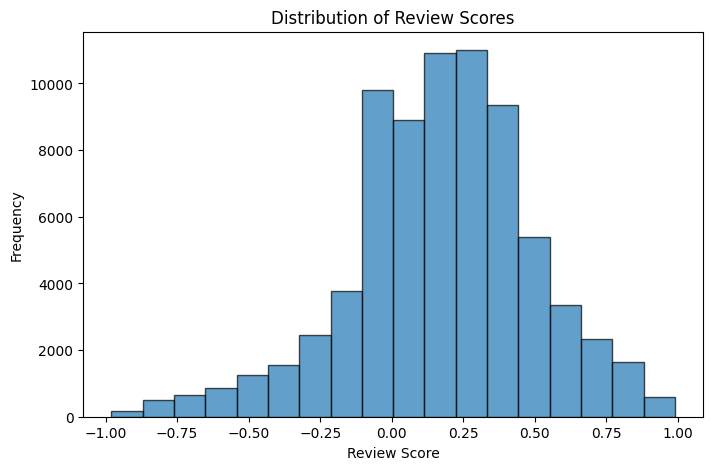

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(hadoop_df['avg_sentiment_val'], bins=18, edgecolor='k', alpha=0.7)
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.show()

In [7]:
from tabulate import tabulate
# Sort the DataFrame by average sentiment score
sorted_df = hadoop_df.sort_values(by='avg_sentiment_val', ascending=False)# Get the top 20 movies
top_20 = sorted_df.head(20)# Display the top 20 movies
table = tabulate(top_20, headers='keys', tablefmt='grid', showindex=False)
print('Top 20 Movies Based on Sentiment Analysis')
print(table)

Top 20 Movies Based on Sentiment Analysis
+------------------------------------------------+---------------------+
| movie_title                                    |   avg_sentiment_val |
+================================================+=====================+
| Yowamushi Pedal                                |                0.99 |
+------------------------------------------------+---------------------+
| Ratburger                                      |                0.98 |
+------------------------------------------------+---------------------+
| A                                              |                0.98 |
+------------------------------------------------+---------------------+
| Anukokunda Oka Roju                            |                0.98 |
+------------------------------------------------+---------------------+
| Vic the Viking and the Magic Sword             |                0.97 |
+------------------------------------------------+---------------------+
| Just Se

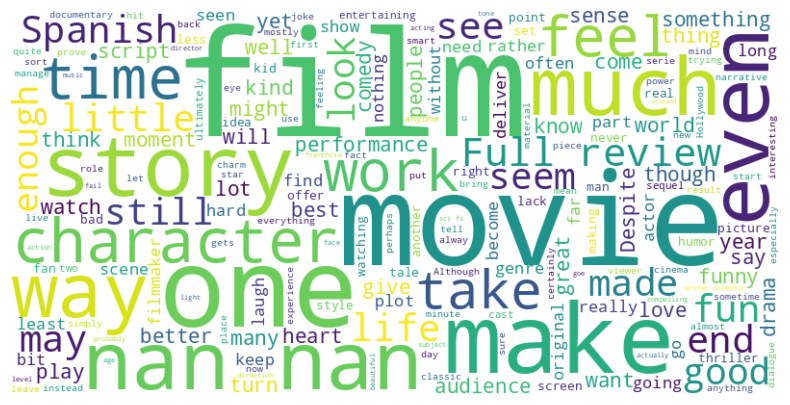

In [14]:
from wordcloud import WordCloud
import concurrent.futures
# Combine all review content into a single text
all_text = ' '.join(dfr1['review_content'].astype(str))# Generate a word cloud using parallel computing
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text)
    return wordcloud
with concurrent.futures.ThreadPoolExecutor(max_workers=6) as executor:
    future = executor.submit(generate_wordcloud, all_text)    
    wordcloud = future.result()
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()